✅ polar_data.csv created successfully


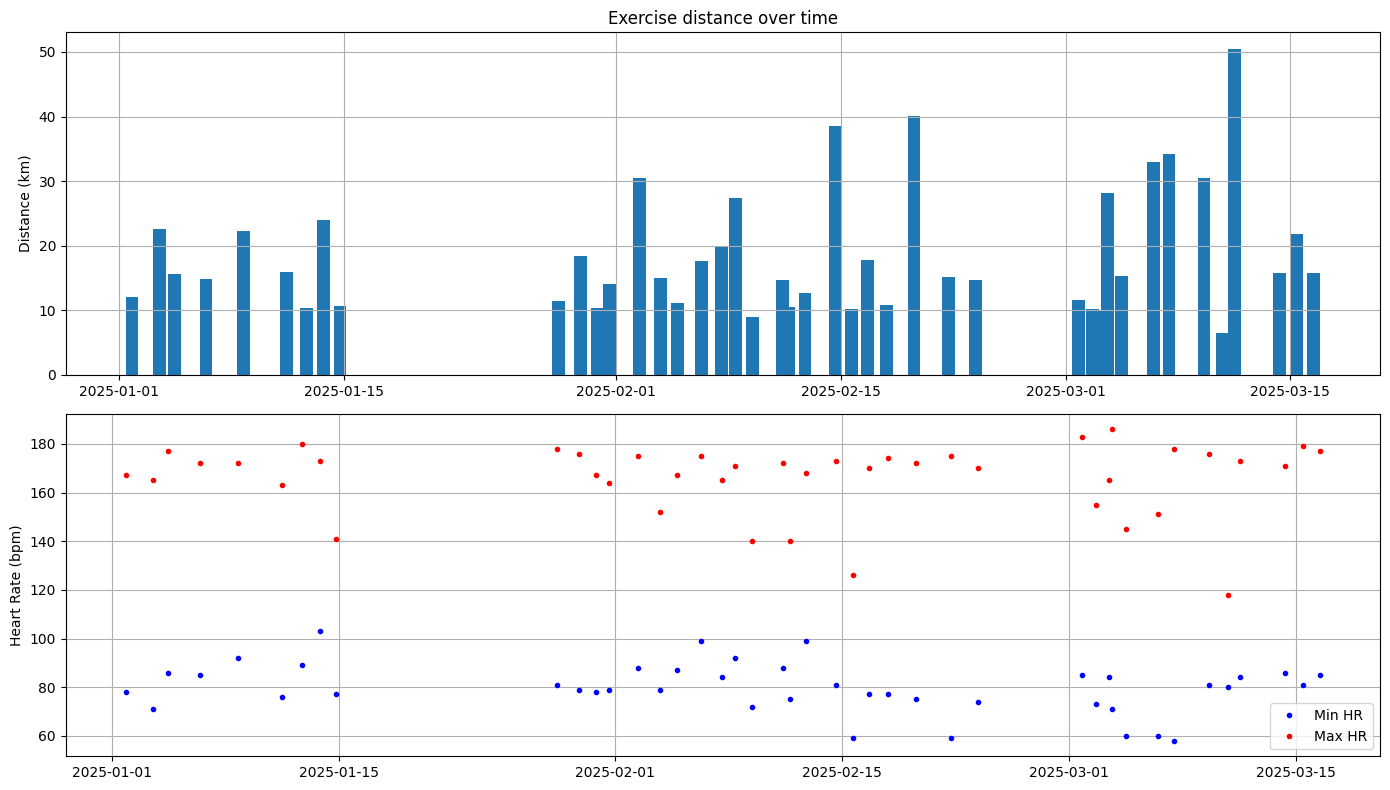

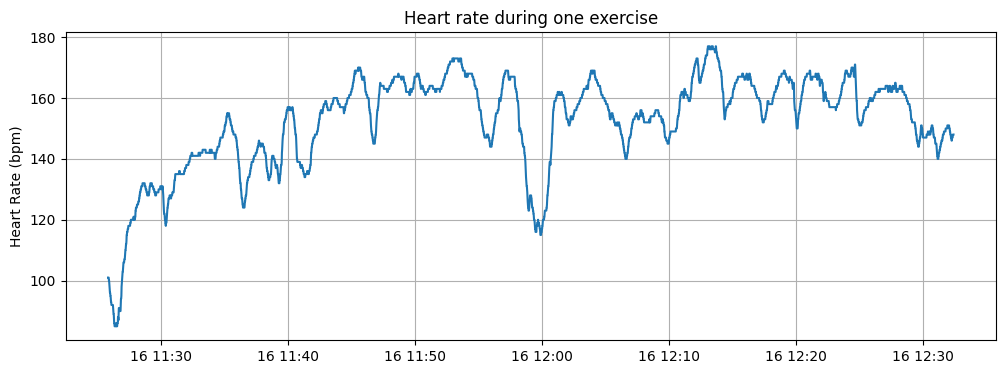

In [1]:
# ============================================================
# # 10. Polar Sportswatch saves exercise data to JSON files; each training session produces one JSON.
# a) Write a Python program to read general information from all the files to one CSV-file
# b) Visualize basic quantities using Streamlit
# c) Write a program to visualize data from one exercise. You can have line plot, bar charts, maps (folium), etc.
# You can see some tips from this Notebook
# ============================================================

import json
import os
import pandas as pd
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# CONFIGURATION
# ------------------------------------------------------------
# Use raw string to avoid Windows path escape issues
FOLDER = r"./Polar_for_Exercise"

# ------------------------------------------------------------
# a) READ GENERAL INFORMATION FROM ALL JSON FILES
# ------------------------------------------------------------
dfs = []  # list to collect all exercise data

for filename in os.listdir(FOLDER):
    if filename.endswith(".json"):
        path = os.path.join(FOLDER, filename)

        with open(path, "r", encoding="utf-8") as file:
            data = json.load(file)

        # Normalize exercise-level information
        df = pd.json_normalize(data["exercises"])
        dfs.append(df)

# Combine all exercises into one DataFrame
df_all = pd.concat(dfs, ignore_index=True)

# Save combined data to CSV
df_all.to_csv("polar_data.csv", index=False)
print("✅ polar_data.csv created successfully")

# ------------------------------------------------------------
# b) VISUALIZE BASIC QUANTITIES (GENERAL OVERVIEW)
# ------------------------------------------------------------
# Convert time columns to datetime
df_all["startTime"] = pd.to_datetime(df_all["startTime"])
df_all["stopTime"] = pd.to_datetime(df_all["stopTime"])

plt.figure(figsize=(14, 8))

# Distance per exercise
plt.subplot(2, 1, 1)
plt.bar(df_all["startTime"], df_all["distance"] / 1000)
plt.ylabel("Distance (km)")
plt.title("Exercise distance over time")
plt.grid()

# Heart rate min / max
plt.subplot(2, 1, 2)
plt.plot(df_all["startTime"], df_all["heartRate.min"], "b.", label="Min HR")
plt.plot(df_all["startTime"], df_all["heartRate.max"], "r.", label="Max HR")
plt.ylabel("Heart Rate (bpm)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# c) VISUALIZE DATA FROM ONE EXERCISE (HEART RATE)
# ------------------------------------------------------------
# Use the last JSON file loaded above
with open(path, "r", encoding="utf-8") as file:
    data = json.load(file)

# Extract heart rate samples from first exercise in the file
hr_samples = data["exercises"][0]["samples"]["heartRate"]

df_hr = pd.DataFrame(hr_samples)
df_hr["dateTime"] = pd.to_datetime(df_hr["dateTime"])

plt.figure(figsize=(12, 4))
plt.plot(df_hr["dateTime"], df_hr["value"])
plt.ylabel("Heart Rate (bpm)")
plt.title("Heart rate during one exercise")
plt.grid()
plt.show()
